# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset 

A base contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens, lançados em ou antes de julho de 2017. 

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


Hipóteses:
1 - Quais são os gêneros de filmes melhor avaliados?
2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?
3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [1]:
# importando as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#%matplotlib inline
import seaborn as sns

In [2]:
# Leitura do dataset
filmes = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')

In [ ]:
# Pré-visaulização do dataset
filmes.head(1)

In [ ]:
# tamanho da nossa base
print('Número de linhas e número de colunas:', filmes.shape)

In [ ]:
filmes.describe()

In [ ]:
filmes.dtypes

--------------------------- TRATAMENTO DE DADOS NULOS ---------------------

In [57]:
# fazendo uma cópia do dataset para ser trabalhado
df = filmes.copy()

In [ ]:
# quantidade de elementos nulos
df.isnull().sum()

In [ ]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

In [58]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
df.drop(['belongs_to_collection'],axis = 1, inplace = True)
df.drop(['homepage'],axis = 1, inplace = True)
df.drop(['poster_path'],axis = 1, inplace = True)     
df.drop(['tagline'],axis = 1, inplace = True)     

In [59]:
# REMOVE ELEMENTOS QUE POSSUEM DADOS NULOS
df = df.dropna()

In [60]:
# resetando os índices
df = df.reset_index()

In [ ]:
# validando se ainda há registros nulos
df.isnull().sum()

-------------------- RENOMEANDO AS FEATURES --------------------------

In [61]:
# renomear as coluna e usar todas com caixa baixa para padronizar
df = df.rename(columns={'adult': "classificacao", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

------------------------ DESCRIÇÃO DAS FEATURES --------------------
# descrição das features

'adulto' - se o filme é exclusivo para adulto ou não 
'despesas' - valor gasto na produção e divulgação dos vídeos
'genero' - quais são os gênceros do filme. Um filme pode ter um ou gêneros
'id' - número que identifica o filme
'imdb_id' - número unico que identifica o filme na base do imdb
'lingua_original' - qual é o idioma original do filme. 
'titulo_original' - titulo original do filme
'descricao' - descrição do filme
'popularidade' - qual é a popularidade do filme
'cia_producao' - qual(is) foi a companhia(s) que produziu o filme. 
'pais_producao' - quais foram os países onde os filmes foram gravados
'data_lancamento' - qual foi a data de lançamento do filme
'receita' -  qual foi a receita obtida com o filme
'duracao' - qual é a duração do filme em minutos
'idiomas_falados' - quais são os idiomas falados no filme. 
'status' - status do filmes. 
'slogan' - qual é o slogan do filme.
'titulo' - qual é o título do filme
'video' - se tem o video ou não do traile
'media_votos' - qual é a média de votos dada pelos usuários
'qtde_votos' - qual foi a quantidade de votos

# Tipos de features e seus possíveis valores

A) Variáveis categóricas:
1 - adulto - contém dois valores: 'false' = 1, 'true' = 0

2 - genero -  contém 29 valores possíveis. Cada registro foi transformado em feature

3 - lingua_original -possui 90 valores possíveis.

4 - cia_producao   - possui 19368 valores possíveis.

5 - pais_producao  - 155 valores possíveis.

6 - idiomas_falado - 73 valores possíveis.

7 - status - 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'  

8 - video - False, True, nan


B) Variáveis discretas: 
despesas, id, imdb_id, titulo_original, descricao,data_lancamento,popularidade,  
receita, duracao(minutos), slogan, titulo, media_votos, qtde_votos          

################ Feature adult #############

In [62]:
# TRANSFORMANDO A FEATURE "adult" EM BINÁRIO, ONDE 'True' = 0 (classificação livre) e 'False' = 1 (são somente para adultos)
df["classificacao"] = df["classificacao"].apply(lambda x: 1 if x == "False" else 0)

In [180]:
#print (df.groupby('classificacao').sum())
print (df.classificacao.value_counts(normalize=True))

1    0.99982
0    0.00018
Name: classificacao, dtype: float64


Text(0.5, 1.0, 'Classificação por quantidade')

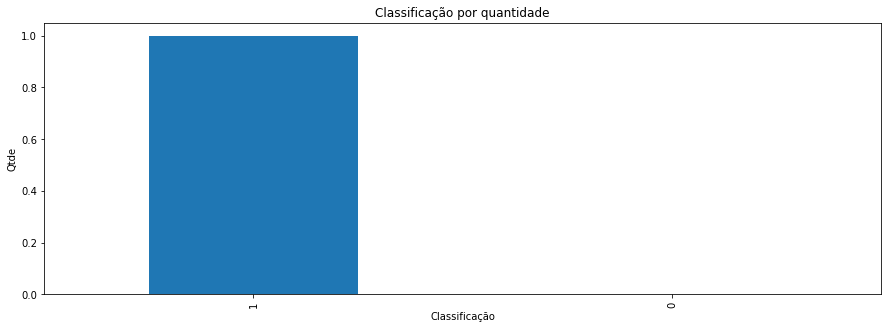

In [181]:
# visualizando A quantidade de registros por classificação
df.classificacao.value_counts(normalize=True).plot.bar()

plt.ylabel('Qtde')
plt.xlabel('Classificação')
plt.title('Classificação por quantidade')

In [63]:
# retirada da feature classificacao
df = df[['despesas', 'genero', 'id', 'imdb_id',
       'lingua_original', 'titulo_original', 'descricao', 'popularidade',
       'cia_producao', 'pais_producao', 'data_lancamento', 'receita',
       'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos']]

Como 99% dos registro tem a classificação 1 (livre), a a feature foi considerada irrelevante e excluída da análise

------------- Transformar as features que são um dicionário em uma lista --------------

- gênero
- pais_producao
- cia_producao

In [ ]:
######## Feature gênero ############

In [64]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['genero'] = df['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):   
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #print ('names antes if len(names) > 1', names)
        tam = len(names)
        x = []
        if (tam > 1):
            t = 0
            #print ('entrei if')
            while t < tam:
                y = names[t]
                #print ('y', y)
                x.append(y)
                #print ('x', x)
                x.sort()
                #print ('x ordenado', x)
                t = t + 1
        if (tam == 1):            
            x.append(names[0])
            #print ('Unico genero', x)
        return x
        #print ('lista ordenada',x)
    return []
df['generos_ordenados'] = df['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente
#df['genero'].apply(get_list)

In [65]:
# VALIDANDO TRANSFORMAÇÃO
df[["generos_ordenados", "genero", "titulo_original"]].head(3)

,generos_ordenados,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Family, Fantasy]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Comedy, Romance]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [66]:
df.genero[54]

[]

In [67]:
df.generos_ordenados[54]

[]

In [68]:
# deletando os filmes que não possuem gênero
# Identificando os filmes que não possuem gênero e os deletando
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['generos_ordenados'][t]) == 0):
        #print ('registro zerado', df.titulo[t], df.genero[t])
        df.drop(t, axis=0, inplace = True )
        z = z + 1
    t = t + 1
print ("total de registros sem gênero excluídos", z)
# reorganiza os índices
df = df.reset_index()

total de registros 44349
total de registros sem gênero excluídos 2112


In [69]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(df.generos_ordenados)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = df.generos_ordenados[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = df.generos_ordenados[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            generos_unicos.sort()
            #print ("lista com os generos únicos ordenado", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [190]:
print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [70]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(df.generos_ordenados).transform(df.generos_ordenados)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [71]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo], axis=1)

In [72]:
# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [ ]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
df.columns

In [73]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
df = df.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})


In [74]:
print ('Features após transformação do genero', df.columns)

Features após transformação do genero Index(['index', 'despesas', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental'],
      dtype='object')


In [75]:
# contagem de qtde de true e false de cada genero criado
print ('acao\n', df.acao.value_counts(normalize=True))
print ('aventura\n', df.aventura.value_counts(normalize=True))
print ('animacao\n', df.animacao.value_counts(normalize=True))
print ('comedia\n', df.comedia.value_counts(normalize=True))
print ('documentario\n', df.documentario.value_counts(normalize=True))
print ('familia\n', df.familia.value_counts(normalize=True))
print ('romance\n', df.romance.value_counts(normalize=True))
print ('ficcao_cientifica\n', df.ficcao_cientifica.value_counts(normalize=True))
print ('filmes_tv\n', df.filmes_tv.value_counts(normalize=True))
print ('suspense\n', df.suspense.value_counts(normalize=True))
print ('gerra\n', df.gerra.value_counts(normalize=True))
print ('ocidental\n', df.ocidental.value_counts(normalize=True))

acao
 False    0.844923
True     0.155077
Name: acao, dtype: float64
aventura
 False    0.91801
True     0.08199
Name: aventura, dtype: float64
animacao
 False    0.954755
True     0.045245
Name: animacao, dtype: float64
comedia
 False    0.697114
True     0.302886
Name: comedia, dtype: float64
documentario
 False    0.908635
True     0.091365
Name: documentario, dtype: float64
familia
 False    0.935412
True     0.064588
Name: familia, dtype: float64
romance
 False    0.842224
True     0.157776
Name: romance, dtype: float64
ficcao_cientifica
 False    0.92857
True     0.07143
Name: ficcao_cientifica, dtype: float64
filmes_tv
 False    0.982243
True     0.017757
Name: filmes_tv, dtype: float64
suspense
 False    0.820584
True     0.179416
Name: suspense, dtype: float64
gerra
 False    0.969079
True     0.030921
Name: gerra, dtype: float64
ocidental
 False    0.975543
True     0.024457
Name: ocidental, dtype: float64


In [76]:
# contabilizando a qtde de registros true de cada gênero
lista_generos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(lista_generos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    genero = lista_generos[x]
    total_genero = sum(df[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)

total de generos 20
genero:  acao | 6550
genero:  aventura | 3463
genero:  animacao | 1911
genero:  comedia | 12793
genero:  crime | 4266
genero:  documentario | 3859
genero:  drama | 19993
genero:  familia | 2728
genero:  fantasia | 2289
genero:  estrangeiro | 1586
genero:  historia | 1376
genero:  horror | 4654
genero:  musical | 1588
genero:  misterio | 2447
genero:  romance | 6664
genero:  ficcao_cientifica | 3017
genero:  filmes_tv | 750
genero:  suspense | 7578
genero:  gerra | 1306
genero:  ocidental | 1033


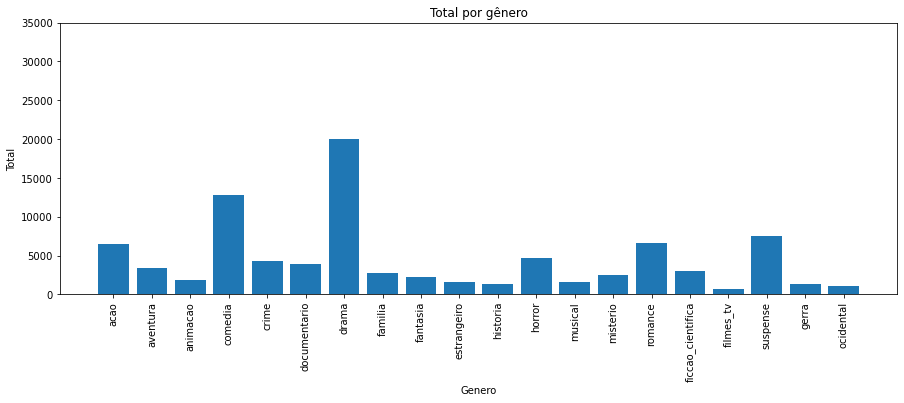

In [198]:
#plotando os totais por generos
plt.bar(lista_generos, lista_totais)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=90)

plt.xlabel("Genero")
plt.ylabel("Total")
plt.title("Total por gênero")

plt.show()

In [82]:
# verificando a correlação dos generos

print ('acao x media_votos',df['acao'].corr(df['media_votos']))
print ('aventura x media_votos',df['aventura'].corr(df['media_votos']))
print ('comedia x media_votos',df['comedia'].corr(df['media_votos']))
print ('crime x media_votos',df['crime'].corr(df['media_votos']))
print ('documentario x media_votos',df['documentario'].corr(df['media_votos']))
print ('drama x media_votos',df['drama'].corr(df['media_votos']))
print ('familia x media_votos',df['familia'].corr(df['media_votos']))
print ('fantasia x media_votos',df['fantasia'].corr(df['media_votos']))
print ('estrangeiro x media_votos',df['estrangeiro'].corr(df['media_votos']))
print ('historia x media_votos',df['historia'].corr(df['media_votos']))
print ('horror x media_votos',df['horror'].corr(df['media_votos']))
print ('musical x media_votos',df['musical'].corr(df['media_votos']))
print ('misterio x media_votos',df['misterio'].corr(df['media_votos']))
print ('romance x media_votos',df['romance'].corr(df['media_votos']))
print ('ficcao_cientifica x media_votos',df['ficcao_cientifica'].corr(df['media_votos']))
print ('filmes_tv x media_votos',df['filmes_tv'].corr(df['media_votos']))
print ('suspense x media_votos',df['suspense'].corr(df['media_votos']))
print ('gerra x media_votos',df['gerra'].corr(df['media_votos']))
print ('ocidental x media_votos',df['ocidental'].corr(df['media_votos']))

acao x media_votos -0.028912571903143076
aventura x media_votos -0.0012013692933449255
comedia x media_votos 0.006505521121131248
crime x media_votos 0.03209839156773264
documentario x media_votos 0.026305854610169085
drama x media_votos 0.11018920587227835
familia x media_votos 0.00849820552700167
fantasia x media_votos 0.010928821471993932
estrangeiro x media_votos 0.005768300727909613
historia x media_votos 0.046767532444214735
horror x media_votos -0.09476441192787506
musical x media_votos 0.018305102918400647
misterio x media_votos 0.015342802900572494
romance x media_votos 0.02370669727118035
ficcao_cientifica x media_votos -0.055990208072114744
filmes_tv x media_votos -0.03463632112990928
suspense x media_votos -0.023323989536076246
gerra x media_votos 0.0335114875251648
ocidental x media_votos -0.04667721391943692


São 20 os tipos de gênero. Um filme tem no mínimo um gênero.
Conforme observamos os generos mais comuns são: drama, comédia, ação, suspense e romance.

######## Feature pais_producao ############

In [201]:
 df['pais_producao'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: pais_producao, dtype: object

In [202]:
 df['pais_producao'].describe()

count                                                 42237
unique                                                 2326
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                  17610
Name: pais_producao, dtype: object

In [200]:
type(df.pais_producao)

pandas.core.series.Series

In [83]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['pais_producao'] = df['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos paises, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_pais_producao'] = df['pais_producao'].apply(get_list) #O retorno será uma lista com todos os paises. quando coloco uma coluna que não existe, ele cria a coluna automaticamente


df[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

,novo_pais_producao,pais_producao,titulo_original
0,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Toy Story
1,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Jumanji
2,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Grumpier Old Men


In [204]:
df.shape

(42237, 43)

In [84]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = df.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = df.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print (pais_producao_unicos)

total de registros do dataset:  42237
pais_producao_unicos:  153
['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Dominican Republic', 'Croatia', 'Russia', 'Macedonia', 'Austria', 'Ireland', 'Taiwan', 'New Zealand', 'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark', 'Finland', 'Sweden', 'Argentina', 'Iceland', 'South Korea', 'Serbia', 'India', 'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania', 'Czech Republic', 'Vietnam', 'Trinidad and Tobago', 'Chile', 'Portugal', 'Norway', 'Hungary', 'Kazakhstan', 'Georgia', 'Luxembourg', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey', 'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina', 'Bahamas', 'Malaysia', 'Bhutan', 'Bulgaria', 'Jamaica', 'Pakistan', 'Nepal', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Cameroon', 'Colombia', 'Czechoslovakia', 'Ur

In [212]:
# contabilizar a qtde de registros únicos, ou seja, a repetição de lista de pais de produção 
# percebe-se que o país que mais produziu filmes foi EUA. 
# Vê-se também que muitos registros estão sem a informação, [] = 4496. Estes registros serão excludídos
df.novo_pais_producao.value_counts().head(20)

[United States of America]                    17610
[]                                             4496
[United Kingdom]                               2198
[France]                                       1531
[Japan]                                        1292
[Italy]                                         832
[Canada]                                        811
[India]                                         704
[Russia]                                        693
[Germany]                                       656
[United Kingdom, United States of America]      567
[South Korea]                                   421
[Canada, United States of America]              362
[Hong Kong]                                     360
[Spain]                                         348
[Australia]                                     329
[Sweden]                                        318
[France, Italy]                                 225
[Finland]                                       219
[Germany, Un

In [216]:
df.shape

(42237, 43)

In [85]:
# deletando os filmes que não possuem país de produção
# Identificando os filmes que não possuem país e os deletando
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['novo_pais_producao'][t]) == 0):
        #print ('registro zerado', df.titulo[t], df.novo_pais_producao[t])
        df.drop(t, axis=0, inplace = True )
        z = z + 1
    t = t + 1
print ("total de registros sem país excluídos", z)
# reorganiza os índices
df = df.reset_index()

total de registros 42237
total de registros sem país excluídos 4496


In [22]:
df.shape

(37741, 44)

In [ ]:
df.novo_pais_producao.head(3)

In [86]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
pais_producao_x = te.fit(df.novo_pais_producao).transform(df.novo_pais_producao)
df_novo_pais_producao = pd.DataFrame(pais_producao_x, columns=te.columns_)

# resetando os índices
df_novo_pais_producao = df_novo_pais_producao.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo_pais_producao], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [87]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_pais_producao.drop(['index'],axis = 1, inplace = True)

In [88]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_pais = df_novo_pais_producao.columns
print (lista_pais)
tam = len(lista_pais)
print ("total de pais", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    pais = lista_pais[x]
    total_pais = sum(df_novo_pais_producao[pais] == True)    
    print ('pais: ', pais, '|',total_pais)
    x += 1
    lista_totais.append (total_pais)

lista_pais_producao = list(zip(lista_totais,lista_pais))

del(lista_pais_producao[0]) # excluindo o valor index

print (lista_pais_producao)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom',
       'United States Minor Outlying Islands', 'United States of America',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yugoslavia',
       'Zimbabwe'],
      dtype='object', length=153)
total de pais 153
pais:  Afghanistan | 7
pais:  Albania | 4
pais:  Algeria | 10
pais:  Angola | 3
pais:  Argentina | 225
pais:  Armenia | 8
pais:  Aruba | 6
pais:  Australia | 559
pais:  Austria | 178
pais:  Azerbaijan | 2
pais:  Bahamas | 5
pais:  Bangladesh | 2
pais:  Barbados | 1
pais:  Belarus | 9
pais:  Belgium | 397
pais:  Bermuda | 1
pais:  Bhutan | 4
pais:  Bolivia | 9
pais:  Bosnia and Herzegovina | 35
pais:  Botswana | 3
pais:  Brazil | 268
pais:  Brunei Darussalam | 1
pais:  Bulgaria | 51
pais:  Burkina Faso | 10
pais:  Cambodia | 9
pais:  Cameroon | 5
pais:  Canada | 1708
pais:  Cayman Isla

In [89]:
# ordenando e revertendo a ordenação
lista_pais_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_pais_producao[0:10]

[(20691, 'United States of America'),
 (3902, 'United Kingdom'),
 (3666, 'France'),
 (2055, 'Germany'),
 (1858, 'Italy'),
 (1708, 'Canada'),
 (1564, 'Japan'),
 (851, 'Spain'),
 (849, 'Russia'),
 (789, 'India')]

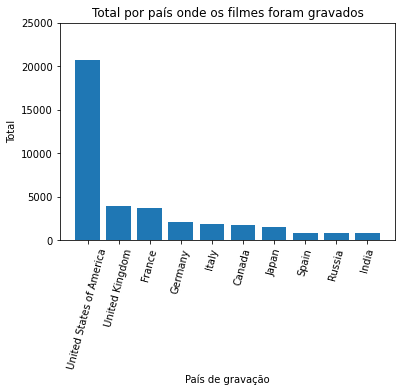

In [27]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_pais_producao[0:10]]
y = [v[0] for v in lista_pais_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 25000)

plt.xticks(rotation=75)

plt.xlabel("País de gravação")
plt.ylabel("Total")
plt.title("Total por país onde os filmes foram gravados")

plt.show()

Observamos que os 10 países onde mais se grava filmes são:
(20903, 'United States of America'),
 (3947, 'United Kingdom'),
 (3737, 'France'),
 (2083, 'Germany'),
 (1919, 'Italy'),
 (1737, 'Canada'),
 (1624, 'Japan'),
 (875, 'Spain'),
 (870, 'Russia'),
 (818, 'India')

################# Feature idiomas_falados ################

In [90]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_idiomas_falados'] = df['idiomas_falados'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

,novo_idiomas_falados,idiomas_falados,titulo_original
0,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,"[English, Français]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men


In [29]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(df.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = df.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = df.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  37741
idiomas_falados_unicos:  73
['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'shqip', 'Italiano', '한국어/조선말', 'Magyar', 'فارسی', 'Dansk', '日本語', 'العربية', 'Hrvatski', 'Bosanski', '', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'বাংলা', 'Srpski', 'Wolof', 'Latviešu', 'Kiswahili', 'ελληνικά', 'Türkçe', 'ภาษาไทย', 'suomi', 'Esperanto', 'български език', 'Український', 'ქართული', 'Cymraeg', 'Bokmål', 'No Language', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'پښتو', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'euskera', 'Fulfulde', 'ozbek', 'Hausa']


In [30]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
idiomas_falados_x = te.fit(df['novo_idiomas_falados']).transform(df['novo_idiomas_falados'])
df_novo_idiomas_falados = pd.DataFrame(idiomas_falados_x, columns=te.columns_)

# resetando os índices
df_novo_idiomas_falados = df_novo_idiomas_falados.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df['novo_idiomas_falados']], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [31]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_idiomas_falados.drop(['index'],axis = 1, inplace = True)

In [32]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_idiomas = df_novo_idiomas_falados.columns
print (lista_idiomas)
tam = len(lista_idiomas)
print ("total de idiomas", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada idioma
#print (type (lista_totais))

while x < tam:
    idiomas = lista_idiomas[x]
    total_idiomas = sum(df_novo_idiomas_falados[idiomas] == True)    
    print ('idiomas: ', idiomas, '|',total_idiomas)
    x += 1
    lista_totais.append (total_idiomas)

lista_total_idiomas_producao = list(zip(lista_totais,lista_idiomas))

del(lista_total_idiomas_producao[0]) # excluindo o valor index

print (lista_total_idiomas_producao)

Index(['', '?????', '??????', 'Afrikaans', 'Azərbaycan', 'Bahasa indonesia',
       'Bahasa melayu', 'Bamanankan', 'Bokmål', 'Bosanski', 'Català',
       'Cymraeg', 'Dansk', 'Deutsch', 'Eesti', 'English', 'Español',
       'Esperanto', 'Français', 'Fulfulde', 'Gaeilge', 'Galego', 'Hausa',
       'Hrvatski', 'Italiano', 'Kinyarwanda', 'Kiswahili', 'Latin', 'Latviešu',
       'Lietuvikai', 'Magyar', 'Malti', 'Nederlands', 'No Language', 'Norsk',
       'Polski', 'Português', 'Pусский', 'Română', 'Slovenčina', 'Slovenščina',
       'Somali', 'Srpski', 'Tiếng Việt', 'Türkçe', 'Wolof', 'euskera',
       'isiZulu', 'ozbek', 'shqip', 'suomi', 'svenska', 'Íslenska', 'Český',
       'ελληνικά', 'Український', 'беларуская мова', 'български език', 'қазақ',
       'עִבְרִית', 'اردو', 'العربية', 'فارسی', 'پښتو', 'हिन्दी', 'বাংলা',
       'ਪੰਜਾਬੀ', 'தமிழ்', 'తెలుగు', 'ภาษาไทย', 'ქართული', '广州话 / 廣州話', '日本語',
       '普通话', '한국어/조선말'],
      dtype='object')
total de idiomas 75
idiomas:   | 376
idioma

In [36]:
# Deletrando os registros com valor '?????' e '??????'
del(lista_total_idiomas_producao[0:2])

# validando a exclusão
lista_total_idiomas_producao

[(26, 'Afrikaans'),
 (4, 'Azərbaycan'),
 (36, 'Bahasa indonesia'),
 (13, 'Bahasa melayu'),
 (6, 'Bamanankan'),
 (1, 'Bokmål'),
 (30, 'Bosanski'),
 (31, 'Català'),
 (5, 'Cymraeg'),
 (272, 'Dansk'),
 (2257, 'Deutsch'),
 (44, 'Eesti'),
 (25845, 'English'),
 (1992, 'Español'),
 (7, 'Esperanto'),
 (3764, 'Français'),
 (2, 'Fulfulde'),
 (20, 'Gaeilge'),
 (4, 'Galego'),
 (1, 'Hausa'),
 (50, 'Hrvatski'),
 (1864, 'Italiano'),
 (3, 'Kinyarwanda'),
 (15, 'Kiswahili'),
 (110, 'Latin'),
 (19, 'Latviešu'),
 (21, 'Lietuvi\x9akai'),
 (300, 'Magyar'),
 (2, 'Malti'),
 (272, 'Nederlands'),
 (277, 'No Language'),
 (147, 'Norsk'),
 (428, 'Polski'),
 (500, 'Português'),
 (1315, 'Pусский'),
 (107, 'Română'),
 (18, 'Slovenčina'),
 (19, 'Slovenščina'),
 (7, 'Somali'),
 (90, 'Srpski'),
 (47, 'Tiếng Việt'),
 (164, 'Türkçe'),
 (12, 'Wolof'),
 (14, 'euskera'),
 (14, 'isiZulu'),
 (1, 'ozbek'),
 (26, 'shqip'),
 (273, 'suomi'),
 (456, 'svenska'),
 (50, 'Íslenska'),
 (258, 'Český'),
 (168, 'ελληνικά'),
 (33, 'Українсь

In [37]:
# ordenando e revertendo a ordenação
lista_total_idiomas_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_total_idiomas_producao[0:10]

[(25845, 'English'),
 (3764, 'Français'),
 (2257, 'Deutsch'),
 (1992, 'Español'),
 (1864, 'Italiano'),
 (1591, '日本語'),
 (1315, 'Pусский'),
 (663, '普通话'),
 (582, 'हिन्दी'),
 (500, 'Português')]

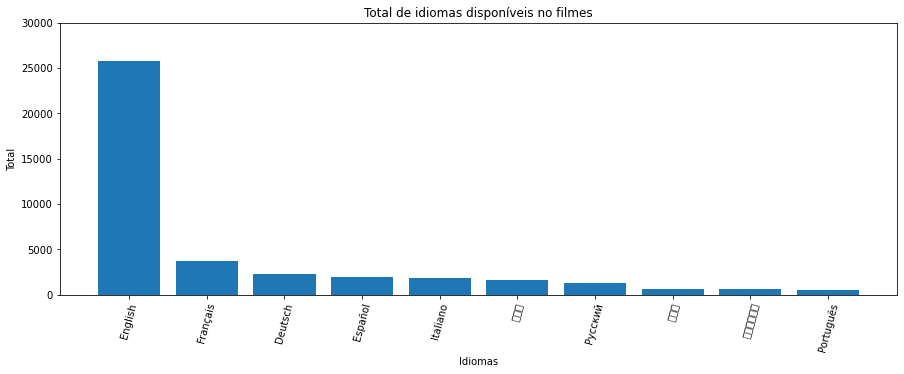

In [38]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_total_idiomas_producao[0:10]]
y = [v[0] for v in lista_total_idiomas_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 30000)

plt.xticks(rotation=75)

plt.xlabel("Idiomas")
plt.ylabel("Total")
plt.title("Total de idiomas disponíveis no filmes")

plt.show()

In [234]:
# Valores únicos da feature, considerando a lista e não cada companhia individualmente
df.novo_idiomas_falados.value_counts().head(20)

[English]                       19960
[Français]                       1604
[日本語]                            1181
[Italiano]                        896
[]                                863
[Español]                         731
[Pусский]                         717
[English, Français]               646
[Deutsch]                         608
[English, Español]                550
[English, Deutsch]                417
[한국어/조선말]                         393
[हिन्दी]                          387
[普通话]                             306
[English, Italiano]               305
[svenska]                         268
[No Language]                     261
[Português]                       236
[English, Français, Deutsch]      214
[suomi]                           192
Name: novo_idiomas_falados, dtype: int64

In [39]:
# identificando os registros que não possuem idiomas falados
# identificando a sigla dos idiomas e convertendo para o nome do idioma, mantendo o padrão da feature novo_idioma_falado
total_registros = len(df)
print ('total de registros', total_registros)
lista_idiomas_originais = [] # lista vazia
t = z = 0 
while t < total_registros:
    if (len(df['novo_idiomas_falados'][t]) == 0):
        #print ('registro zerado', df.lingua_original[t], df.novo_idiomas_falados[t])
        df['novo_idiomas_falados'][t].append(df.lingua_original[t])
        z = z + 1
    t = t + 1
print ("total de registros atualizados", z, lista_idiomas_originais)

total de registros 37741
total de registros atualizados 863 []


In [40]:
# Validando se os registros zerados foram atualizados
df.novo_idiomas_falados.value_counts().head(20)

[English]                       19960
[Français]                       1604
[日本語]                            1181
[Italiano]                        896
[en]                              748
[Español]                         731
[Pусский]                         717
[English, Français]               646
[Deutsch]                         608
[English, Español]                550
[English, Deutsch]                417
[한국어/조선말]                         393
[हिन्दी]                          387
[普通话]                             306
[English, Italiano]               305
[svenska]                         268
[No Language]                     261
[Português]                       236
[English, Français, Deutsch]      214
[suomi]                           192
Name: novo_idiomas_falados, dtype: int64

Observamos que os idiomas mais frequentes são:
(28537, 'English'),
 (3999, 'Français'),
 (2443, 'Deutsch'),
 (2176, 'Español'),
 (2071, 'Italiano')

############### Feature cia_producao ######################

In [91]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['cia_producao'] = df['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_cia_producao'] = df['cia_producao'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

,novo_cia_producao,cia_producao,titulo_original
0,[Pixar Animation Studios],"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story
1,"[TriStar Pictures, Teitler Film, Interscope Co...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji
2,"[Warner Bros., Lancaster Gate]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men


In [ ]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    cia = df.novo_cia_producao[x]
    tam_cia = len(cia)
    i = z = b = 0
    while (i < tam_cia): 
        cada_cia_registo = df.novo_cia_producao[x][i]
        if (not cada_cia_registo in cia_unicos):      
            cia_unicos.append(cada_cia_registo)
            z +=1
        i += 1        
    x += 1

print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

In [232]:
# Valores únicos da feature, considerando a lista e não cada companhia individualmente
df.novo_cia_producao.value_counts().head(20)

[]                                          5344
[Metro-Goldwyn-Mayer (MGM)]                  729
[Warner Bros.]                               534
[Paramount Pictures]                         498
[Twentieth Century Fox Film Corporation]     427
[Universal Pictures]                         316
[RKO Radio Pictures]                         247
[Columbia Pictures Corporation]              203
[Mosfilm]                                    144
[Columbia Pictures]                          144
[Universal International Pictures (UI)]       79
[Walt Disney Pictures]                        77
[Walt Disney Productions]                     73
[New Line Cinema]                             72
[Touchstone Pictures]                         69
[Toho Company]                                65
[TriStar Pictures]                            60
[Orion Pictures]                              60
[Shaw Brothers]                               60
[Hammer Film Productions]                     58
Name: novo_cia_produ

Tratamento das demais features

In [ ]:
# verificando os valores da feature status
df.status.unique()

In [345]:
df.status.value_counts()

Released           37490
Rumored              153
Post Production       75
In Production         14
Planned                9
Name: status, dtype: int64

In [346]:
# Avaliação dos valores 'In Production', Planned' e 'Canceled'
# após análise, os valores serão mantidos
select = df.status == 'Canceled'
df[select]

,level_0,index,despesas,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,...,misterio,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,novo_pais_producao,novo_idiomas_falados,novo_cia_producao


Text(0.5, 1.0, 'Total por status')

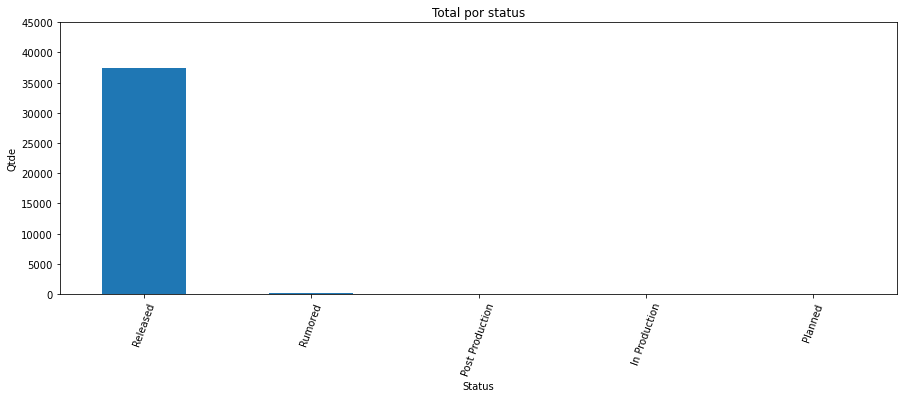

In [347]:
# visualizando os dados de status
df.groupby(by='status').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 45000)

plt.xticks(rotation=70)

plt.ylabel('Qtde')
plt.xlabel('Status')
plt.title('Total por status')

In [375]:
df.status.unique()

array(['Released', 'Rumored', 'Post Production', 'In Production',
       'Planned'], dtype=object)

In [94]:
# Convertando strings em numéricos usanso dicionário

df['status'] = df['status'].map({
'Released': 0, 'Rumored': 1, 'Post Production': 2, 'In Production': 3, 'Planned': 4})

In [95]:
# verificando a correlação da feature
print ('status x media_votos',df['status'].corr(df['media_votos']))

status x media_votos -0.02176152181042492


Na época de disponibilização do dataset (2017), foram avaliados filmes lançados e ainda não lançados

Released           44010 #  já lançados

Rumored              214 # rumores da mídia sobre o lançamento

Post Production       96 # avaliados pós produção, mas ainda não lançados

In Production         16 # avaliados ainda em produção

Planned               12 # avaliação do projeto do filme

Canceled               1 # avaliação do filme antes de concluir a produção e ser lançado. Este filme, teve problemas para ser concluído, tendo sido lançado alguns anos depois, não estando, atualmente, cancelado.

Feature data de lançamento do filmes

In [96]:
# Converter a data de lançamento para ter somente o ano
data = df['data_lancamento'] # se o resultado for uma lista das datas do banco
ano = [a.split('-')[0] for a in data]
df['ano_lancamento'] = ano

# validando a transformação
df[['data_lancamento','ano_lancamento']].head(2)

,data_lancamento,ano_lancamento
0,1995-10-30,1995
1,1995-12-15,1995


In [349]:
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10)

ano_lancamento
2014    1624
2015    1572
2013    1513
2011    1348
2012    1338
2016    1333
2009    1308
2010    1219
2008    1199
2007    1065
dtype: int64

Text(0.5, 1.0, 'Os 10 anos de lançamento mais frequentes')

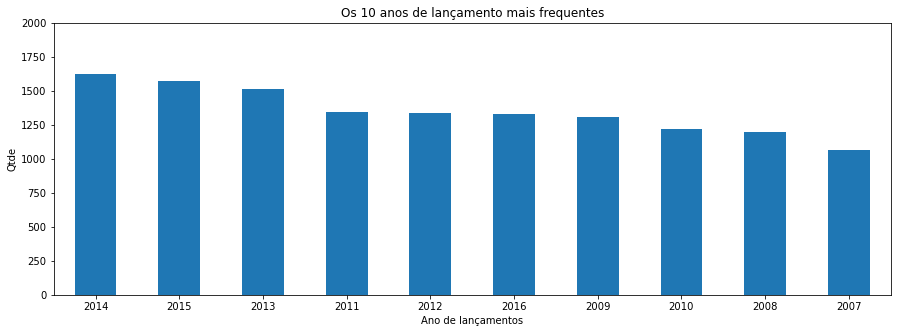

In [350]:
# visualizando os 10 anos mais frequentes
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Ano de lançamentos')
plt.title('Os 10 anos de lançamento mais frequentes')

In [97]:
# verificando a correlação das features
print ('ano_lancamento x media_votos',df_final['ano_lancamento'].corr(df_final['media_votos']))

ano_lancamento x media_votos 0.0325551687604308


In [106]:
df.ano_lancamento.value_counts()

2014    1624
2015    1572
2013    1513
2011    1348
2012    1338
        ... 
1893       1
1883       1
1887       1
1874       1
1892       1
Name: ano_lancamento, Length: 135, dtype: int64

In [113]:
df.ano_lancamento = df.ano_lancamento.astype('int64')

In [114]:
# avaliando a quantidade de períodos a serem criados 
intervals = pd.qcut(df['ano_lancamento'], 10).astype(str).unique()
intervals

array(['(1993.0, 2000.0]', '(1970.0, 1982.0]', '(1982.0, 1993.0]',
       '(1952.0, 1970.0]', '(1873.999, 1952.0]', '(2000.0, 2005.0]',
       '(2009.0, 2012.0]', '(2012.0, 2014.0]', '(2005.0, 2009.0]',
       '(2014.0, 2020.0]'], dtype=object)

In [123]:
# criando os perídos para definir o ano de lançamento dos filmes
df['periodo'] = pd.qcut(df['ano_lancamento'], 10).astype(str).map({intervals[0]: '1993 a 2000',
        intervals[1]: '1970 a 1982',
        intervals[2]: '1982 a 1993',
        intervals[3]: '1952 a 1970',
        intervals[4]: '1873 a 1952',
        intervals[5]: '2000 a 2005',
        intervals[6]: '2009 a 2012',
        intervals[7]: '2012 a 2014',
        intervals[8]: '2005 a 2009',
        intervals[9]: '2014 a 2020'} ).astype(str)

df[['ano_lancamento','periodo']]

,ano_lancamento,periodo
0,1995,1993 a 2000
1,1995,1993 a 2000
2,1995,1993 a 2000
3,1995,1993 a 2000
4,1995,1993 a 2000
...,...,...
37736,2000,1993 a 2000
37737,1995,1993 a 2000
37738,1991,1982 a 1993
37739,2011,2009 a 2012


In [131]:
"""Relação entre periodo e media_votos."""

survived = titanic[titanic['Sobreviveu?'] == 1].groupby('Tipo_Tarifa')['Sobreviveu?'].count().values
not_survived = titanic[titanic['Sobreviveu?'] == 0].groupby('Tipo_Tarifa')['Sobreviveu?'].count().values
index = titanic[titanic['Sobreviveu?'] == 1].groupby('Tipo_Tarifa')['Sobreviveu?'].count().index.values

df = pd.DataFrame({'Sobreviveu': survived,
                   'Não Sobreviveu': not_survived}, index=index)
ax = df.plot.bar(rot=0)

NameError: name 'titanic' is not defined

Conforme observamos, os anos de lançamento mais comuns são 2014, 2015, 2013 e 2012.

In [ ]:
############### Feature despesas #######################

In [ ]:
df.despesas.describe()

In [132]:
# convertendo a feature para float
df.despesas = df.despesas.astype('float64')

In [ ]:
df.despesas.describe()

In [352]:
# os 10 maiores despesas
df.groupby(by='despesas').size().sort_values(ascending = False).head(10)

despesas
0.0           29208
5000000.0       270
10000000.0      258
20000000.0      242
2000000.0       227
15000000.0      222
3000000.0       214
25000000.0      205
30000000.0      188
4000000.0       177
dtype: int64

In [133]:
# retirada da feature despesas
df = df[['genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'acao', 'aventura', 'animacao',
       'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia',
       'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento']]

Conforme observamos, 75% dos filmes não possui informação de despesas. Portanto, a feature não será utilizada ma análise/predição

In [ ]:
################# Feature original_language ################

In [ ]:
df.lingua_original.describe()

In [354]:
df.lingua_original.value_counts(normalize=True)


en    0.703188
fr    0.056570
ja    0.033412
it    0.028537
de    0.023502
        ...   
hy    0.000026
qu    0.000026
eo    0.000026
zu    0.000026
mt    0.000026
Name: lingua_original, Length: 86, dtype: float64

In [355]:
df.groupby(by='lingua_original').size().sort_values(ascending = False).head(10)

lingua_original
en    26539
fr     2135
ja     1261
it     1077
de      887
es      836
ru      726
hi      431
ko      418
zh      374
dtype: int64

Text(0.5, 1.0, 'Os 10 idiomas originais mais frequentes')

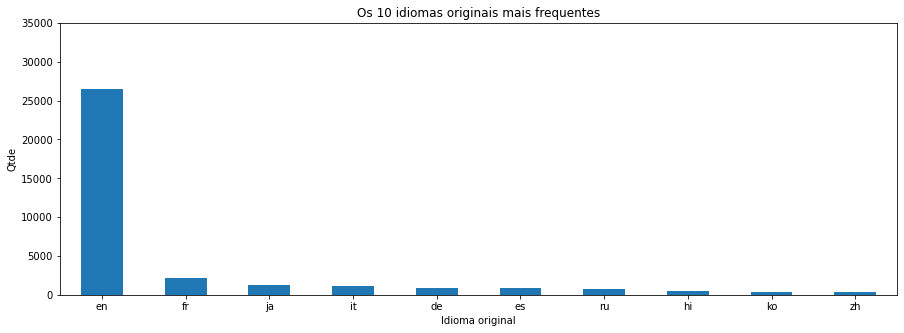

In [356]:
# visualizando os 10 idiomas originais mais frequentes
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Idioma original')
plt.title('Os 10 idiomas originais mais frequentes')

O idioma mais frequente é o inglês(en), com 32062, seguindo do francês(fr) com 2278, japonês (ja) com 1345 e o italiano com 1264.

In [ ]:
############# Feature popularidade ##############

In [ ]:
df.popularidade.describe()

In [139]:
# convertendo a featue para float
df.popularidade = df.popularidade.astype('float64')

In [ ]:
df.popularidade.describe()

In [ ]:
df.popularidade.head(3)

In [358]:
df.popularidade.unique()

array([21.946943, 17.015539, 11.7129  , ...,  5.683753,  0.178241,
        0.903007])

In [359]:
# qtde de registros únicos de popularidade
x = df.popularidade
len(x.unique())

37012

In [140]:
# verificando a correlacao da feature com o tareget
print ('popularidade x media_votos',df['popularidade'].corr(df['media_votos']))

popularidade x media_votos 0.14443623793921787


In [153]:
# validando quantos intervalos criar
intervals = pd.qcut(df['popularidade'], 4).astype(str).unique()
intervals

array(['(4.747, 547.488]', '(1.472, 4.747]', '(0.554, 1.472]',
       '(-0.001, 0.554]'], dtype=object)

In [155]:
df['tipo_popularidade'] = pd.qcut(df['popularidade'], 4).astype(str).map( {intervals[0]: 'Baixa',
                                            intervals[1]: 'Media',
                                            intervals[2]: 'Alta',
                                            intervals[3]: 'Altissima'} ).astype(str)
df[['popularidade','tipo_popularidade']]

,popularidade,tipo_popularidade
0,21.946943,Baixa
1,17.015539,Baixa
2,11.712900,Baixa
3,3.859495,Media
4,8.387519,Baixa
...,...,...
37736,0.386450,Altissima
37737,0.661558,Alta
37738,5.683753,Baixa
37739,0.178241,Altissima


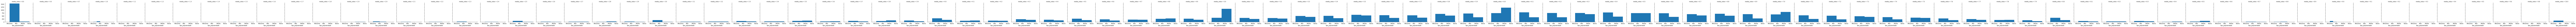

In [157]:
"""Relação entre status e media_votos."""

#import seaborn as sns
g = sns.FacetGrid(df, col='media_votos')
g.map (plt.hist,'tipo_popularidade', bins=2)

In [ ]:
########### Feature receitas #############

In [ ]:
df.receita.head(3)

In [ ]:
df.receita.describe()

In [360]:
# qtde de registros únicos de receita
len(df.receita.unique())

6701

In [158]:
# retirada da feature receita
df = df[['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados', 'index',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento']]

Conforme observamos, 75% dos filmes não possui valor de receita. A feature não será utilizada na análise/predição

################### duração #################


In [ ]:
df.duracao.head(3)

In [ ]:
df.duracao.describe()

In [362]:
# qtde de registros únicos
len(df.duracao.unique())

321

In [363]:
# os 10 anos de lançamento mais frequentes
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.0     2088
100.0    1248
95.0     1205
93.0     1049
96.0      962
92.0      932
91.0      915
94.0      910
97.0      909
98.0      897
dtype: int64

In [47]:
# muitos registros possuem duração zero. Estes casos serão substituidos pela média
df['duracao'].replace(0,df['duracao'].mean(), inplace=True)

In [365]:
# verificando o impacto da atualização dos valores zerados de duração
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.0     2088
100.0    1248
95.0     1205
93.0     1049
96.0      962
92.0      932
91.0      915
94.0      910
97.0      909
98.0      897
dtype: int64

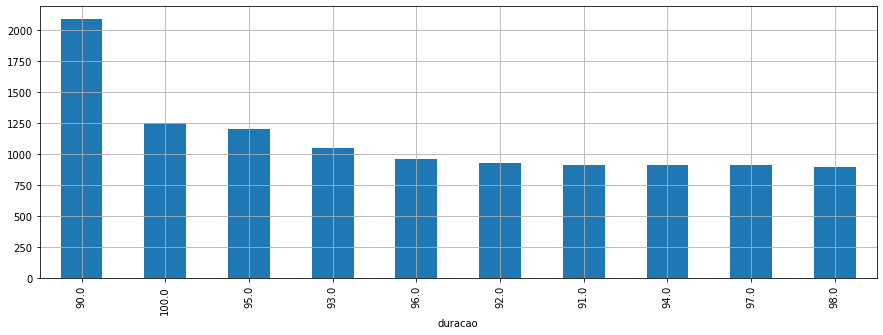

In [366]:
df.groupby(by='duracao').size().sort_values(ascending = False).head(10).plot.bar()
plt.grid(True)

In [160]:
# verificando a correlação das features
print ('duracao x media_votos',df['duracao'].corr(df['media_votos']))

duracao x media_votos 0.1473548209521749


In [161]:
df.duracao.describe()

count    37741.000000
mean        97.193212
std         33.428301
min          0.000000
25%         87.000000
50%         96.000000
75%        108.000000
max       1256.000000
Name: duracao, dtype: float64

In [163]:
# definindo quantos grupos criar
intervals = pd.qcut(df['duracao'], 4).astype(str).unique()
intervals

array(['(-0.001, 87.0]', '(96.0, 108.0]', '(108.0, 1256.0]',
       '(87.0, 96.0]'], dtype=object)

In [168]:
# criando os crupos numa nova feature
df['tipo_duracao'] = pd.qcut(df['duracao'], 4).astype(str).map( {intervals[0]: 'Curto',
                            intervals[1]: 'Medio',
                            intervals[2]: 'Longo',
                            intervals[2]: 'Muito longo'} ).astype(str)
df[['duracao','tipo_duracao']]

,duracao,tipo_duracao
0,81.0,Curto
1,104.0,Medio
2,101.0,Medio
3,127.0,Muito longo
4,106.0,Medio
...,...,...
37736,30.0,Curto
37737,85.0,Curto
37738,104.0,Medio
37739,360.0,Muito longo


In [171]:
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'generos_ordenados', 'index',
       'index', 'acao', 'aventura', 'animacao', 'comedia', 'crime',
       'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro',
       'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento', 'tipo_duracao'],
      dtype='object')

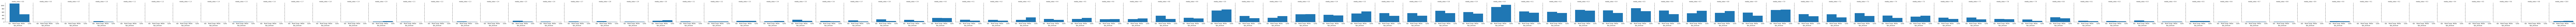

In [170]:
"""Relação entre status e media_votos."""

#import seaborn as sns
g = sns.FacetGrid(df, col='media_votos')
g.map(plt.hist, 'tipo_duracao', bins=2)

75% dos filmes, tem duração de 107 minutos.
1118 filmes estão com duração zero. Para estes, o valor foi atualizado pela média, 95.069945.
As durações mais frequentes são:
90 minutos, com 2527, seguido de 100 minutos com 1453, 95 minutos com 1393, 93 minutos com 1207.
95.069945     1118

Devido a grande variedade de registros únicos de popularidade, não vi ganho em agrupar, contabilizar e plotar

In [175]:
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'generos_ordenados', 'index',
       'index', 'acao', 'aventura', 'animacao', 'comedia', 'crime',
       'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro',
       'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento', 'tipo_duracao'],
      dtype='object')

In [177]:
# seleção das features que serão utilizada. Foram ordenadas de forma mais intuitiva
df_reduzido = df[['lingua_original', 'descricao', 'popularidade', 'duracao', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'generos_ordenados', 
       'acao', 'aventura', 'animacao', 'comedia', 'crime',
       'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro',
       'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento', 'tipo_duracao']]

-------------- ALTERAÇÃO DO TIPOS DAS FEATURES ---------------



In [178]:
df_reduzido.dtypes

lingua_original          object
descricao                object
popularidade            float64
duracao                 float64
status                    int64
titulo                   object
video                    object
media_votos             float64
qtde_votos              float64
generos_ordenados        object
acao                       bool
aventura                   bool
animacao                   bool
comedia                    bool
crime                      bool
documentario               bool
drama                      bool
familia                    bool
fantasia                   bool
estrangeiro                bool
historia                   bool
horror                     bool
musical                    bool
misterio                   bool
romance                    bool
ficcao_cientifica          bool
filmes_tv                  bool
suspense                   bool
gerra                      bool
ocidental                  bool
novo_pais_producao       object
novo_idi

In [182]:
# converter variáveis object para categoricas
df_reduzido.status = df_reduzido.status.astype('category')

#df.adulto = df.adulto.astype('category')
#df.titulo_original = df.titulo_original.astype('category')
#df.titulo = df.titulo.astype('category')
df_reduzido.novo_pais_producao = df_reduzido.novo_pais_producao.astype('category')
df_reduzido.novo_idiomas_falados = df_reduzido.novo_idiomas_falados.astype('category')
df_reduzido.novo_cia_producao = df_reduzido.novo_cia_producao.astype('category')
df_reduzido.tipo_duracao = df_reduzido.tipo_duracao.astype('category')

# converter variáveis objecto para float ou inteiro
df_reduzido.popularidade = df_reduzido.popularidade.astype('float64')
df_reduzido.ano_lancamento = df_reduzido.ano_lancamento.astype('int64')
#df.despesas = df.despesas.astype('float64')
#df.receita = df.receita.astype('float64')
#df.qtde_votos = df.qtde_votos.astype('int64')
#df.id = df.id.astype('int64')


In [183]:
df_reduzido.dtypes

lingua_original         category
descricao                 object
popularidade             float64
duracao                  float64
status                  category
titulo                    object
video                     object
media_votos              float64
qtde_votos               float64
generos_ordenados         object
acao                        bool
aventura                    bool
animacao                    bool
comedia                     bool
crime                       bool
documentario                bool
drama                       bool
familia                     bool
fantasia                    bool
estrangeiro                 bool
historia                    bool
horror                      bool
musical                     bool
misterio                    bool
romance                     bool
ficcao_cientifica           bool
filmes_tv                   bool
suspense                    bool
gerra                       bool
ocidental                   bool
novo_pais_

# devido ao conteúdo das features: overview (visão geral), titulo, titulo original, não foram analisadas

In [184]:
print('Tamanho original do dataset:', filmes.shape)
print('Tamanho final do dataset:', df_reduzido.shape)

Tamanho original do dataset: (45466, 24)
Tamanho final do dataset: (37741, 35)


In [185]:
print ('Features originais', filmes.columns)
print ('Features finais', df_reduzido.columns)

Features originais Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Features finais Index(['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],
      dtype='object')


In [186]:
# salvando o dataset num CSV
w = df_reduzido[['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao']]
       
w.to_csv("C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/filmes_df_limpo.csv",columns=['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],index=False)

In [2]:
# lendo o arquivo
df_final = pd.read_csv(r'C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/filmes_df_limpo.csv')

In [188]:
df_final.shape

(37741, 35)

In [13]:
######### EXCLUIR 

df_final.novo_pais_producao = df_final.novo_pais_producao.astype('category')
df_final.novo_idiomas_falados = df_final.novo_idiomas_falados.astype('category')
df_final.novo_cia_producao = df_final.novo_cia_producao.astype('category')
df_final.tipo_duracao = df_final.tipo_duracao.astype('category')
df_final.generos_ordenados = df_final.generos_ordenados.astype('category')
         

In [11]:
df_final.dtypes

lingua_original           object
descricao                 object
popularidade             float64
duracao                  float64
status                     int64
titulo                    object
video                       bool
media_votos              float64
qtde_votos               float64
generos_ordenados         object
acao                        bool
aventura                    bool
animacao                    bool
comedia                     bool
crime                       bool
documentario                bool
drama                       bool
familia                     bool
fantasia                    bool
estrangeiro                 bool
historia                    bool
horror                      bool
musical                     bool
misterio                    bool
romance                     bool
ficcao_cientifica           bool
filmes_tv                   bool
suspense                    bool
gerra                       bool
ocidental                   bool
novo_pais_

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Questionamentos a serem investigados:

1 - As maiores média de votos está relacionada a algum genero específico?

2 - As maiores média de votos está relacionada a algum idioma original? 

3 - As maiores média de votos está relacionada a algum cia de produção?

In [ ]:
###### 1 - As maiores média de votos está relacionada a algum genero específico? ######

Text(0, 0.5, 'Média Votos')

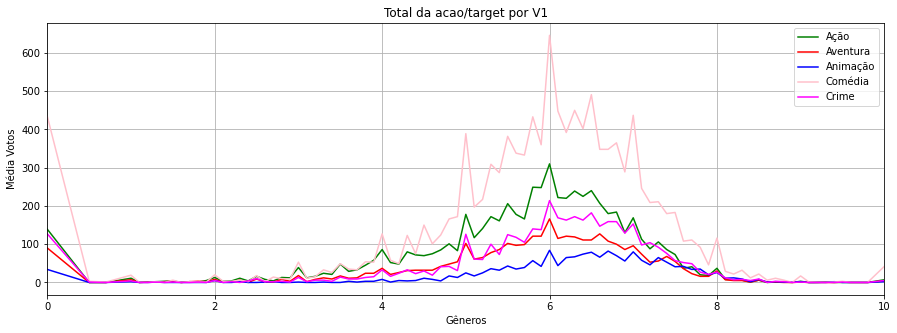

In [380]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['acao'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ação')
x['aventura'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Aventura')
x['animacao'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Animação')
x['comedia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Comédia')
x['crime'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Crime')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que a comédia é o gênero com maior média de votos, seguido da ação

Text(0, 0.5, 'Média Votos')

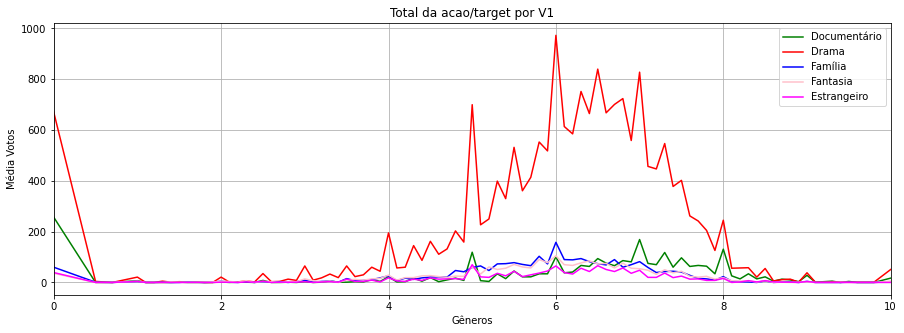

In [381]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['documentario'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Documentário')
x['drama'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Drama')
x['familia'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Família')
x['fantasia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Fantasia')
x['estrangeiro'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Estrangeiro')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, estando os demais mais ou menos no memo nível

Text(0, 0.5, 'Média Votos')

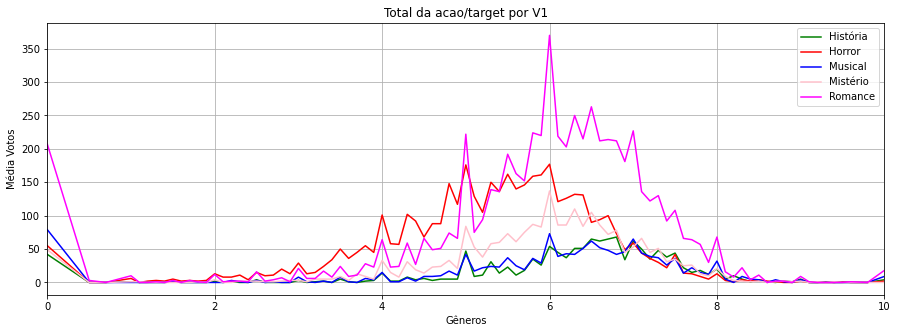

In [382]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['historia'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='História')
x['horror'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Horror')
x['musical'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Musical')
x['misterio'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Mistério')
x['romance'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Romance')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o romance é o gênero com maior média de votos, segido do horror.

Text(0, 0.5, 'Média Votos')

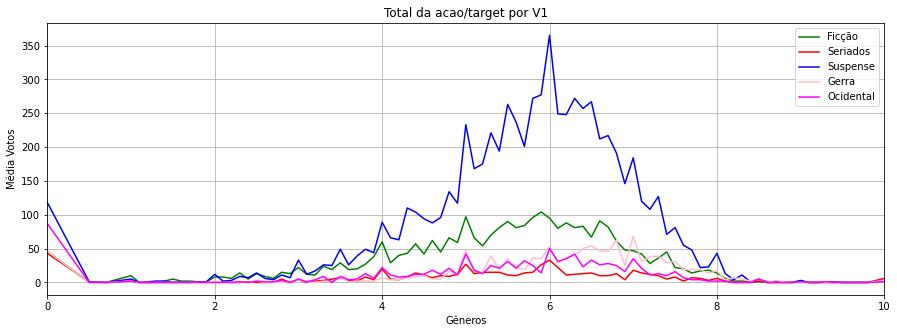

In [383]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['ficcao_cientifica'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ficção')
x['filmes_tv'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Seriados')
x['suspense'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Suspense')
x['gerra'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Gerra')
x['ocidental'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Ocidental')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o suspense é o gênero com maior média de votos, seguido da ficção

Text(0, 0.5, 'Média Votos')

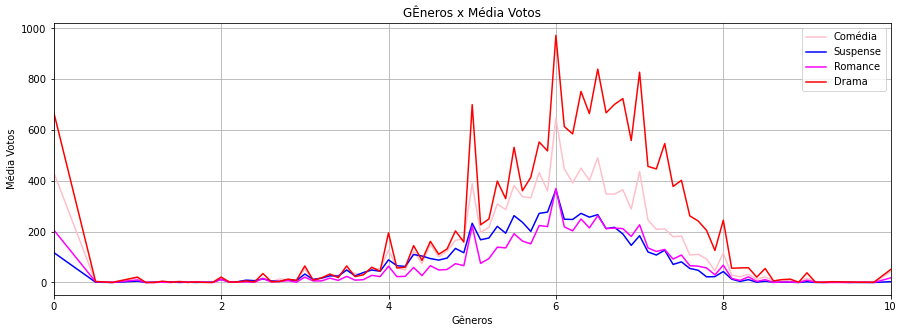

In [384]:
# plotando os maiores dos gêneros obtidos nos gráficos acima

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['comedia'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='Comédia')
x['suspense'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Suspense')
x['romance'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Romance')
x['drama'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Drama')

plt.legend()
plt.title('GÊneros x Média Votos')
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, seguido da comédia. Os demais estão parecidos.

In [55]:
df_final.columns

Index(['titulo_original', 'descricao', 'popularidade', 'duracao', 'status',
       'lingua_original', 'titulo', 'video', 'media_votos', 'qtde_votos',
       'generos_ordenados', 'acao', 'aventura', 'animacao', 'comedia', 'crime',
       'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro',
       'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento'],
      dtype='object')

In [58]:
df_final.groupby(by='generos_ordenados').size().sort_values(ascending = False).head(10)

generos_ordenados
['Drama']                         4445
['Comedy']                        2966
['Documentary']                   1745
['Comedy', 'Drama']               1493
['Drama', 'Romance']              1490
['Comedy', 'Romance']             1018
['Comedy', 'Drama', 'Romance']     939
['Horror']                         870
['Horror', 'Thriller']             641
['Drama', 'Thriller']              615
dtype: int64

In [69]:
df_final[['generos_ordenados','media_votos']].groupby('generos_ordenados').sum().sort_values(by = 'media_votos', ascending = False).head(10)

,media_votos
generos_ordenados,
['Drama'],26498.8
['Comedy'],16610.3
['Documentary'],10408.0
"['Comedy', 'Drama']",9113.3
"['Drama', 'Romance']",8932.1
"['Comedy', 'Romance']",5670.3
"['Comedy', 'Drama', 'Romance']",5665.1
['Horror'],4379.6
"['Drama', 'Thriller']",3642.6


Text(0.5, 1.0, 'Gêneros x média de votos')

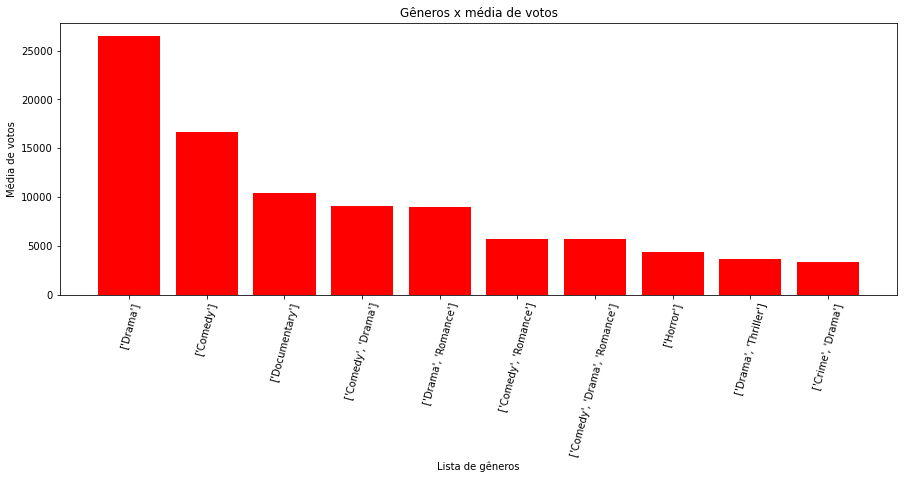

In [78]:
# plotando os 10 generos (lista) com maior média de votos
x = df_final[['generos_ordenados','media_votos']].groupby('generos_ordenados').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.generos_ordenados,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Lista de gêneros")
plt.ylabel("Média de votos")
plt.title("Gêneros x média de votos")

In [197]:
df_final.columns

Index(['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],
      dtype='object')

In [202]:
df_final[['titulo','acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv']]

,titulo,acao,aventura,animacao,comedia,crime,documentario,drama,familia,fantasia,estrangeiro,historia,horror,musical,misterio,romance,ficcao_cientifica,filmes_tv
0,Toy Story,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1,Jumanji,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,Grumpier Old Men,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Waiting to Exhale,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
4,Father of the Bride Part II,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37736,The Burkittsville 7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
37737,Caged Heat 3000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
37738,Robin Hood,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
37739,Century of Birthing,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [207]:
# Reescalando os gêneros
generos = df_final[['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental']]

In [206]:
from sklearn.preprocessing import StandardScaler

In [209]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos) 
generos_escalados


array([[-0.4405777 , -0.30913032,  4.56794971, ..., -0.48053328,
        -0.1840834 , -0.16284676],
       [-0.4405777 ,  3.23488165, -0.2189166 , ..., -0.48053328,
        -0.1840834 , -0.16284676],
       [-0.4405777 , -0.30913032, -0.2189166 , ..., -0.48053328,
        -0.1840834 , -0.16284676],
       ...,
       [ 2.26974718, -0.30913032, -0.2189166 , ..., -0.48053328,
        -0.1840834 , -0.16284676],
       [-0.4405777 , -0.30913032, -0.2189166 , ..., -0.48053328,
        -0.1840834 , -0.16284676],
       [ 2.26974718, -0.30913032, -0.2189166 , ...,  2.08102132,
        -0.1840834 , -0.16284676]])

In [210]:
# agrupando os dados usando KMeans

from sklearn.cluster import KMeans

In [212]:
# função para executar o KMeans variando a qtde de clusters para definir quantos cluster usar
def kmeans (numero_de_clusters, generos):
    modelo =KMeans (n_clusters = numero_de_clusters)
    modelo.fit(generos)
    return (numero_de_clusters, modelo.inertia_) # inertia é o desvio médio quadrático


In [ ]:
# chamando a função kmenas
resultado = [kmeans(numero_de grupos, generos_escalados) for numeros_de_grupos in range (1,41)
resultado


In [ ]:
Conforme observamos, o gênero que possui a maior média de votos é o Drama, seja isolado, seja em conjunto com outros gêneros. Dos 10 maiores, o Drama está presente em 6. 

In [ ]:
###### 2 - As maiores média de votos está relacionada a algum idioma original?  ######

In [189]:
df_final.columns

Index(['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],
      dtype='object')

In [83]:
df_final[['lingua_original','media_votos']].groupby('lingua_original').sum().sort_values(by = 'media_votos', ascending = False).head(10)

,media_votos
lingua_original,
en,149979.9
fr,13198.0
ja,8012.8
it,6159.3
de,5388.6
es,4988.2
ru,4187.7
ko,2748.9
hi,2529.6


Text(0.5, 1.0, 'Lingua x média de votos')

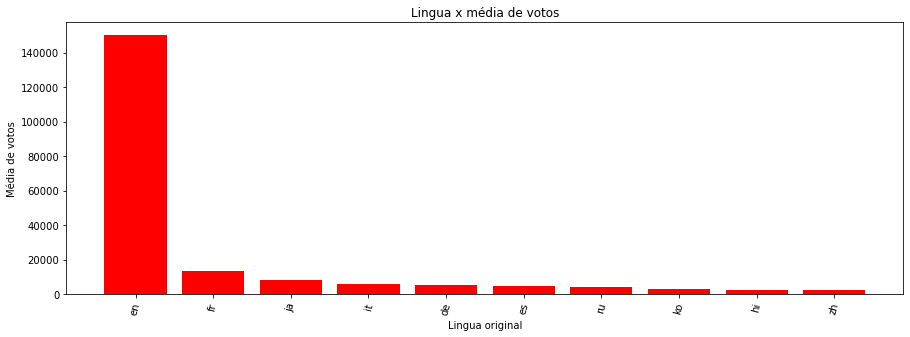

In [85]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['lingua_original','media_votos']].groupby('lingua_original').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.lingua_original,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Lingua original")
plt.ylabel("Média de votos")
plt.title("Lingua x média de votos")

Conforme observamos a lingua com a maior média de votos é disparadamente o inglês.
-----------------------------------------------------------------------------------

In [ ]:
###### 3 - As maiores média de votos está relacionada a algum cia de produção? ######

In [190]:
df_final.columns

Index(['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],
      dtype='object')

In [11]:
df_final[['novo_cia_producao','media_votos']].groupby('novo_cia_producao').sum().sort_values(by = 'media_votos', ascending = False).head(10)

,media_votos
novo_cia_producao,
[],29402.6
['Metro-Goldwyn-Mayer (MGM)'],3896.8
['Warner Bros.'],2926.9
['Paramount Pictures'],2887.2
['Twentieth Century Fox Film Corporation'],2541.3
['Universal Pictures'],1881.4
['RKO Radio Pictures'],1272.2
['Columbia Pictures Corporation'],1122.5
['Mosfilm'],863.8


Text(0.5, 1.0, 'Cia de produção x média de votos')

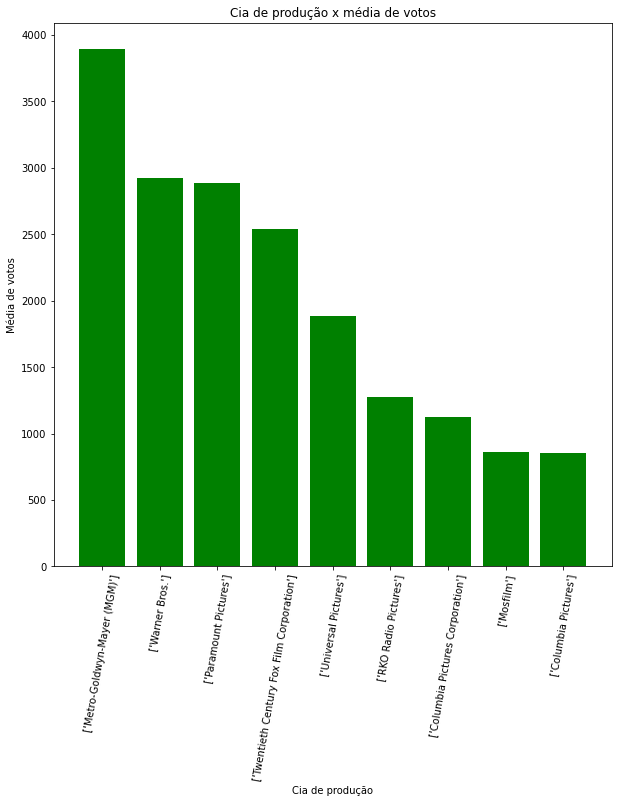

In [10]:
# plotando os 10 cia com maior média de votos
x = df_final[['novo_cia_producao','media_votos']].groupby('novo_cia_producao').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.novo_cia_producao[1:20],x.media_votos[1:20],color='green')

plt.rcParams['figure.figsize'] = [10, 10]

plt.xticks(rotation=80)
plt.xlabel("Cia de produção")
plt.ylabel("Média de votos")
plt.title("Cia de produção x média de votos")# plotando os 10 idiomas originais com maior média de votos

Conforme observamos, os filmes que foram produzidos pela cia MGG é americana e possui as maiores média de votos.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

Será feita uma regressão para tentar prever a media de votos para um filme.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


In [15]:
nomalização
# dimensionar os valores dos dados em um intervalo especificado, como -1,0 a 1,0 ou 0,0 a 1,0. dimensionar os valores dos dados em um intervalo especificado, como -1,0 a 1,0 ou 0,0 a 1,0.

MinMaxScalerMinMaxScaler 
# Transforma as features ao deixá-las na mesma escala em um determinado range. Este estimador escala e traduz cada feature individualmente de forma que esta estará em um determinado intervalo no conjunto de treino, por exemplo, entre zero e um.Transforma as features ao deixá-las na mesma escala em um determinado range. Este estimador escala e traduz cada feature individualmente de forma que esta estará em um determinado intervalo no conjunto de treino, por exemplo, entre zero e um.

Standard Scaler
#  coloca na mesma escala. coloca na mesma escala. Padroniza as features removendo a média e escala a variância a uma unidade.Padroniza as features removendo a média e escala a variância a uma unidade. cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos. Mais uma vez, modelos Não Baseados em Árvores de Decisão se beneficiam mais deste tipo de padronização.cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos. Mais uma vez, modelos Não Baseados em Árvores de Decisão se beneficiam mais deste tipo de padronização.


Rank Rank
# define espaços entre valores devidamente ordenados para que sejam iguais.define espaços entre valores devidamente ordenados para que sejam iguais. Se você ainda não tiver lidado com outliers até o momento, Rank funciona melhor do que o MinMaxScaler , já que este coloca os outliers mais próximos aos outros objetos. Mais uma vez, essa abordagem funciona muito bem com modelos Lineares, KNN e Redes Neurais.Se você ainda não tiver lidado com outliers até o momento, Rank funciona melhor do que o MinMaxScaler , já que este coloca os outliers mais próximos aos outros objetos. Mais uma vez, essa abordagem funciona muito bem com modelos Lineares, KNN e Redes Neurais.

PCA
# REDUÇÃO DE DIMENSIONALIDADE


SyntaxError: invalid syntax (<ipython-input-15-7e30cdc0e52d>, line 7)

In [191]:
df_final.columns

Index(['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao'],
      dtype='object')

In [192]:
# Separando o target (media_votos) para normalizar
df_final_X = df_final[['lingua_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'qtde_votos', 'generos_ordenados',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento',
       'tipo_duracao']]
df_final_y = df_final[['media_votos']]

In [193]:
df_final.shape

(37741, 35)

In [194]:
df_final_X.shape

(37741, 34)

In [195]:
df_final_y.shape

(37741, 1)

In [ ]:
PCA

In [196]:
# Normalizando pelo Desvio Padrao
preprocessed_scaled = preprocessing.scale(df_final_X)
print("Check if STD = 1 std:", preprocessed_scaled.std())

ValueError: could not convert string to float: 'en'

**NORMALIZANDO OS DADOS USANDO MIN/MAX do sklearn**

In [15]:
df_final.shape

(37741, 35)

In [16]:
df_final.head(3)

,titulo_original,descricao,popularidade,duracao,status,lingua_original,titulo,video,media_votos,qtde_votos,...,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,novo_pais_producao,novo_idiomas_falados,novo_cia_producao,ano_lancamento
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,0,en,Toy Story,False,7.7,5415.0,...,False,False,False,False,False,False,['United States of America'],['English'],['Pixar Animation Studios'],1995
1,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,104.0,0,en,Jumanji,False,6.9,2413.0,...,False,False,False,False,False,False,['United States of America'],"['English', 'Français']","['TriStar Pictures', 'Teitler Film', 'Intersco...",1995
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,101.0,0,en,Grumpier Old Men,False,6.5,92.0,...,True,False,False,False,False,False,['United States of America'],['English'],"['Warner Bros.', 'Lancaster Gate']",1995


In [17]:
columns = df_final.columns

In [18]:
from sklearn import preprocessing

x = df_final #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() #dimensiona e traduz cada recurso individualmente, de modo que esteja no intervalo especificado no conjunto de treinamento (entre zero e um)
x_scaled = min_max_scaler.fit_transform(x)
df_normalizado = pd.DataFrame(x_scaled)
df_normalizado

# renomeando as colunas
df_normalizado.set_axis(cols, axis='columns', inplace=True)

ValueError: could not convert string to float: 'Toy Story'

3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*